In [1]:
##########################################################################
# Created on Sat Nov 16 23:35:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 12.6.1.Calculate IV using Newton's method

In [2]:
def impvol_call_Newton(C,S,K,r,T):
    '''Define a function to calculate implied volatility of European call option using Newton's method.
    C:market option price
    S:underlying price
    K:strike price
    r:risk free rate(continuous compound)
    T:time to expire in year'''
    import utils
    
    sigma0=0.2
    diff=C-utils.option_BSM(S,K,sigma0,r,T,'call')
    i=0.0001
    while abs(diff)>0.0001:
        diff=C-utils.option_BSM(S,K,sigma0,r,T,'call')
        if diff>0:
            sigma0+=i
        else:sigma0-=i
    return sigma0

In [3]:
def impvol_put_Newton(P,S,K,r,T):
    '''Define a function to calculate implied volatility of European put option using Newton's method.
    P:market option price
    S:underlying price
    K:strike price
    r:risk free rate(continuous compound)
    T:time to expire in year'''
    import utils
    
    sigma0=0.2
    diff=P-utils.option_BSM(S,K,sigma0,r,T,'put')
    i=0.0001
    while abs(diff)>0.0001:
        diff=P-utils.option_BSM(S,K,sigma0,r,T,'put')
        if diff>0:
            sigma0+=i
        else:sigma0-=i
    return sigma0

In [4]:
import datetime as dt

T0=dt.datetime(2020,9,1)
T1=dt.datetime(2021,3,24)
tenor=(T1-T0).days/365

price_call=0.2826
price_put=0.1975
price_50ETF=3.406
shibor_6M=0.02847
K_50ETF=3.3

sigma_call=impvol_call_Newton(C=price_call,S=price_50ETF,K=K_50ETF,r=shibor_6M,T=tenor)
sigma_put=impvol_put_Newton(P=price_put,S=price_50ETF,K=K_50ETF,r=shibor_6M,T=tenor)

print('IV(Newton\'s method) of 50 ETF call option is ',round(sigma_call,4))
print('IV(Newton\'s method) of 50 ETF put option is ',round(sigma_put,4))

IV(Newton's method) of 50 ETF call option is  0.195
IV(Newton's method) of 50 ETF put option is  0.2719


# 12.6.2.Calculate IV using binary search method

In [13]:
def impvol_call_Binary(C,S,K,r,T):
    '''Define a function to calculate implied volatility of European call option using binary search method.
    C:market option price
    S:underlying price
    K:strike price
    r:risk free rate(continuous compound)
    T:time to expire in year'''
    import utils
    
    sigma_min=0.001
    sigma_max=1.000
    sigma_mid=(sigma_min+sigma_max)/2
    
    call_min=utils.option_BSM(S,K,sigma_min,r,T,'call')
    call_max=utils.option_BSM(S,K,sigma_max,r,T,'call')
    call_mid=utils.option_BSM(S,K,sigma_mid,r,T,'call')
    diff=C-call_mid
    if C<call_min or C>call_max:
        print('Error')
        exit

    while abs(diff)>1e-6:
        diff=C-utils.option_BSM(S,K,sigma_mid,r,T,'call')
        sigma_mid=(sigma_min+sigma_max)/2
        call_mid=utils.option_BSM(S,K,sigma_mid,r,T,'call')
        if C>call_mid:
            sigma_min=sigma_mid
        else:sigma_max=sigma_mid
    return sigma_mid

In [14]:
def impvol_put_Binary(P,S,K,r,T):
    '''Define a function to calculate implied volatility of European put option using binary search method.
    P:market option price
    S:underlying price
    K:strike price
    r:risk free rate(continuous compound)
    T:time to expire in year'''
    import utils
    
    sigma_min=0.001
    sigma_max=1.000
    sigma_mid=(sigma_min+sigma_max)/2
    
    put_min=utils.option_BSM(S,K,sigma_min,r,T,'put')
    put_max=utils.option_BSM(S,K,sigma_max,r,T,'put')
    put_mid=utils.option_BSM(S,K,sigma_mid,r,T,'put')
    diff=P-put_mid
    if P<put_min or P>put_max:
        print('Error')
        exit

    while abs(diff)>1e-6:
        diff=P-utils.option_BSM(S,K,sigma_mid,r,T,'put')
        sigma_mid=(sigma_min+sigma_max)/2
        put_mid=utils.option_BSM(S,K,sigma_mid,r,T,'put')
        if P>put_mid:
            sigma_min=sigma_mid
        else:sigma_max=sigma_mid
    return sigma_mid

In [15]:
sigma_call=impvol_call_Binary(C=price_call,S=price_50ETF,K=K_50ETF,r=shibor_6M,T=tenor)
sigma_put=impvol_put_Binary(P=price_put,S=price_50ETF,K=K_50ETF,r=shibor_6M,T=tenor)

print('IV(Binary search method) of 50 ETF call option is ',round(sigma_call,4))
print('IV(Binary search method) of 50 ETF put option is ',round(sigma_put,4))

IV(Binary search method) of 50 ETF call option is  0.1951
IV(Binary search method) of 50 ETF put option is  0.2718


# 12.6.3.Volatility smile

In [8]:
import numpy as np

S_Dec31=3.635
R_Dec31=0.02838

T2=dt.datetime(2020,12,31)
T3=dt.datetime(2021,6,23)
tenor1=(T3-T2).days/365

Put_list=np.array([0.0202,0.0306,0.0458,0.0671,0.0951,0.1300,0.1738,0.2253,0.2845,0.3540,0.4236])
K_list1=np.array([3.0000,3.1000,3.2000,3.3000,3.4000,3.5000,3.6000,3.7000,3.8000,3.9000,4.0000])

n1=len(K_list1)
sigma_list1=np.zeros_like(Put_list)

for i in np.arange(n1):
    sigma_list1[i]=impvol_put_Newton(P=Put_list[i],S=S_Dec31,K=K_list1[i],r=R_Dec31,T=tenor1)

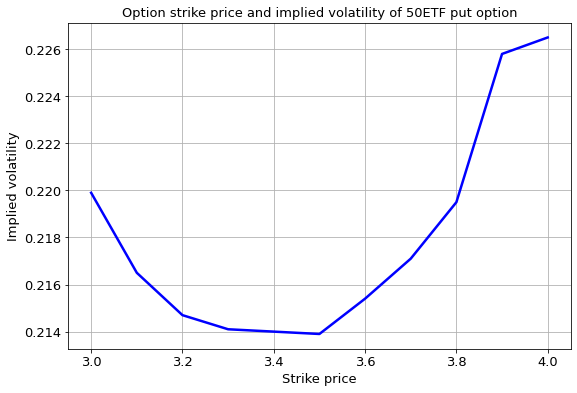

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(K_list1,sigma_list1,'b-',lw=2.5)
plt.xlabel('Strike price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Implied volatility',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Option strike price and implied volatility of 50ETF put option',fontsize=13)
plt.grid()
plt.show()

# 12.6.4.Volatility skew

In [11]:
S_Sep30=4.5848
R_Sep30=0.02691

T4=dt.datetime(2020,9,30)
T5=dt.datetime(2021,3,24)
tenor2=(T5-T4).days/365

Call_list=np.array([0.4660,0.4068,0.3529,0.3056,0.2657,0.2267,0.1977,0.1707,0.1477,0.1019])
K_list2=np.array([4.2000,4.3000,4.4000,4.5000,4.6000,4.7000,4.8000,4.9000,5.0000,5.2500])

n2=len(K_list2)
sigma_list2=np.zeros_like(Call_list)

for i in np.arange(n2):
    sigma_list2[i]=impvol_call_Binary(C=Call_list[i],S=S_Sep30,K=K_list2[i],r=R_Sep30,T=tenor2)

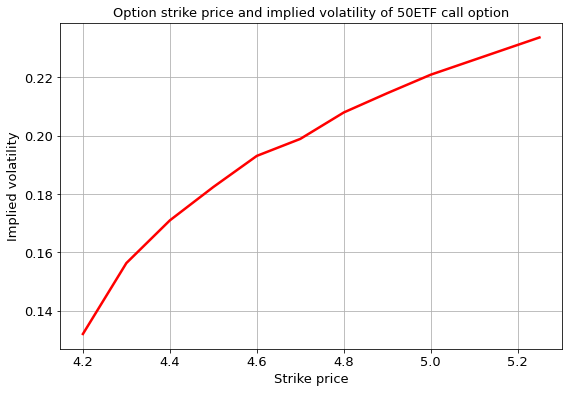

In [12]:
plt.figure(figsize=(9,6))
plt.plot(K_list2,sigma_list2,'r-',lw=2.5)
plt.xlabel('Strike price',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Implied volatility',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Option strike price and implied volatility of 50ETF call option',fontsize=13)
plt.grid()
plt.show()